# Quake Exercise

1.download the data from the Internet

In [1]:
import requests
quakes = requests.get("http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
                      params={
                          'starttime': "2000-01-01",
                          "maxlatitude": "58.723",
                          "minlatitude": "50.008",
                          "maxlongitude": "1.67",
                          "minlongitude": "-9.756",
                          "minmagnitude": "1",
                          "endtime": "2018-10-11",
                          "orderby": "time-asc"}
                      )

import json

my_request = json.loads(quakes.text)

2.explore the keys of the dictionary

In [2]:
my_request.keys()

dict_keys(['type', 'metadata', 'features', 'bbox'])

3.search for the largest quake using for loop

In [3]:
quake_feature=my_request['features']

In [4]:
largest_quake = quake_feature[0]
for quake in quake_feature:
    if quake['properties']['mag'] > largest_quake['properties']['mag']:
        largest_quake = quake
print("largest_quake",largest_quake['properties']['mag'])

largest_quake 4.8


4.store the location of the largest quake

In [5]:
long,lat= largest_quake['geometry']['coordinates'][0],largest_quake['geometry']['coordinates'][1]
print(long,lat)

-2.15 52.52


5.download a map and plot the largest quake on the map

In [6]:
def request_map_at(lat, long, satellite=True,
                   zoom=10, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"

    params = dict(
        z=zoom,
        size="{},{}".format(size[0], size[1]),
        ll="{},{}".format(long, lat),
        l="sat" if satellite else "map",
        lang="en_US"
    )

    return requests.get(base, params=params)

In [7]:
map_large_quake = request_map_at(lat, long, zoom=10, satellite=False)

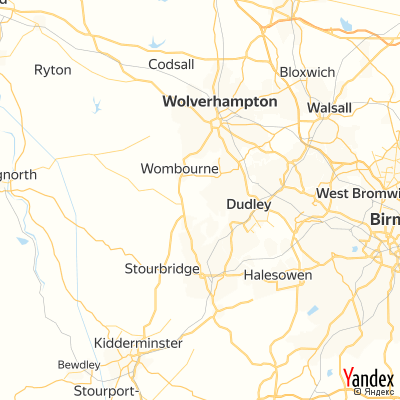

In [8]:
from IPython.display import Image
Image(map_large_quake.content)